In [3]:
import sys
import os

sys.path.append(os.path.abspath("../src")) 
os.chdir("..")

In [16]:
from preprocessing import get_preprocess
from features import get_features
from train import split, initializeXGB, predicateXGB, initializeLG, predicateLG, initializeRTC, predicateRTC
from evaluate import confuse
import matplotlib.pyplot as plt

df = get_preprocess()
features, target = get_features(df)

features, target = split(features, target)

# XBG Classifier

20.260393873085338
Accuracy: 0.9395802568577438, Precision: 0.24040747028862477, Recall: 0.13558023745691306


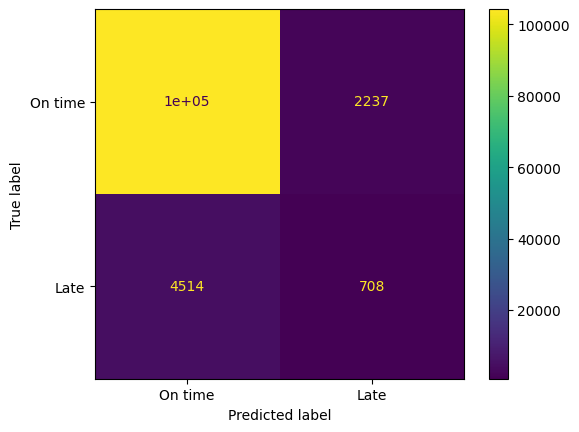

In [19]:
model = initializeXGB(features, target)

preds = predicateXGB(features, target, model, threshold=0.7)

cm, disp, stats = confuse(target, preds)

disp.plot()
print(f"Accuracy: {stats[0]}, Precision: {stats[1]}, Recall: {stats[2]}")
plt.show()

Confusion matrixen viser at modellen korrekt klassifiserer rundt 100 000 ordre som levert i tide (true negatives) og 708 faktiske forsinkelser (true positives). Samtidig produserer modellen 2 237 falske alarmer (ordre predikert som “Late” som egentlig var i tide) og 4 514 forsinkelser som ikke blir fanget opp (false negatives).

### Modellen oppnår:
- Accuracy: 93.96 %
- Precision: 24.04 %
- Recall: 13.56 %

Precision på 24 % betyr at omtrent én av fire ordre som varsles som forsinket faktisk er forsinket. Dette er betydelig høyere enn andelen sene leveranser i datasettet (4.7 %), noe som indikerer at modellen har reell prediktiv verdi. Recall på 13.6 % viser imidlertid at modellen bare fanger opp en begrenset andel av de faktiske forsinkelsene.

Ved å øke threshold til 0.7 har vi gjort modellen mer konservativ, noe som reduserer antall falske alarmer og øker precision, men på bekostning av lavere recall. Dette illustrerer den klassiske tradeoffen mellom presisjon og sensitivitet i ubalanserte klassifikasjonsproblemer.

# Logistic regression

Accuracy: 0.9531928223027699, Precision: 0.25, Recall: 0.0007659900421294523


c:\Users\Franix\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


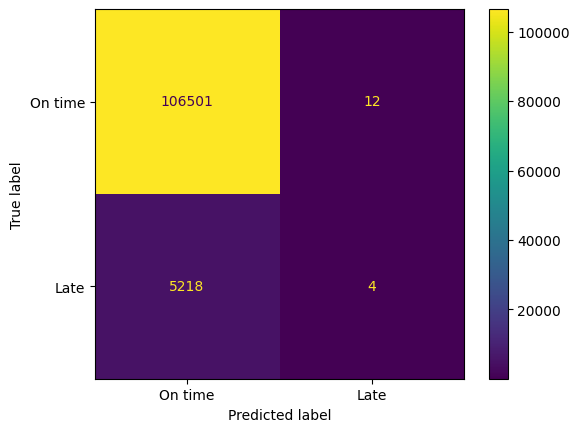

In [15]:
logreg = initializeLG(features, target)

predictionsLG = predicateLG(features, target, logreg)

confusion_matrix, disp_confusion_matrix, statistics = confuse(target, predictionsLG)

disp_confusion_matrix.plot()
print(f"Accuracy: {statistics[0]}, Precision: {statistics[1]}, Recall: {statistics[2]}")
plt.show()

Confusion matrixen viser at modellen korrekt klassifiserer 106 501 ordre som levert i tide (true negatives), men bare 4 faktiske forsinkelser blir korrekt identifisert (true positives). Samtidig overser modellen 5 218 faktiske forsinkelser (false negatives) og gir kun 12 falske alarmer (false positives).

### Modellen oppnår:
- Accuracy: 95.32 %
- Precision: 25.0 %
- Recall: 0.08 %

Den høye accuracy skyldes den sterke klasseubalansen i datasettet (ca. 95 % av ordrene er levert i tide). Modellen predikerer nesten alltid “On time”, noe som gir få falske alarmer og relativt høy precision, men svært lav recall. Dette betyr at modellen i praksis nesten ikke klarer å oppdage forsinkede leveranser.

Sammenlignet med XGBoost fremstår Logistic Regression som for konservativ og lite egnet til å identifisere risiko for forsinkelse, selv om den oppnår høy total nøyaktighet.

# Random Forest Classifier

Accuracy: 0.9543831386763324, Precision: 0.6666666666666666, Recall: 0.04787437763309077


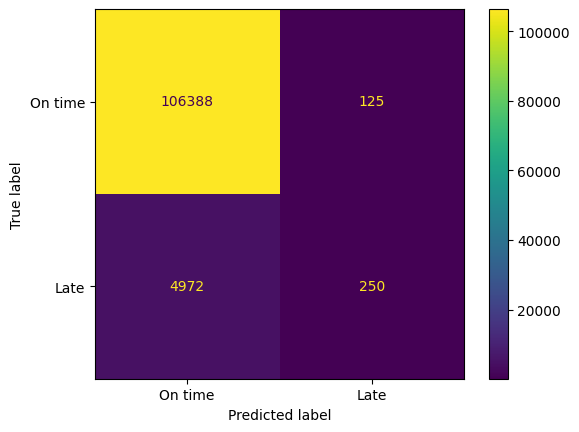

In [18]:
rtc = initializeRTC(features, target)

predictionsRTC = predicateRTC(features, target, rtc)

confusion_matrix, disp_confusion_matrix, statistics = confuse(target, predictionsRTC)

disp_confusion_matrix.plot()
print(f"Accuracy: {statistics[0]}, Precision: {statistics[1]}, Recall: {statistics[2]}")
plt.show()

Confusion matrixen viser at modellen korrekt klassifiserer 106 388 ordre som levert i tide (true negatives) og 250 faktiske forsinkelser (true positives). Samtidig produserer modellen 125 falske alarmer (false positives) og overser 4 972 faktiske forsinkelser (false negatives).

### Modellen oppnår:
- Accuracy: 95.44 %
- Precision: 66.67 %
- Recall: 4.79 %

Den høye accuracy skyldes den sterke klasseubalansen i datasettet, hvor majoriteten av ordrene leveres i tide. Precision på 66.7 % betyr at når modellen først varsler en forsinkelse, har den ofte rett. Imidlertid er recall svært lav, noe som innebærer at modellen kun fanger opp en liten andel av de faktiske forsinkelsene.

Random Forest fremstår derfor som svært konservativ: den gir få falske alarmer, men oppdager også svært få forsinkede leveranser. Sammenlignet med XGBoost identifiserer den langt færre risikofylte ordre, selv om presisjonen er høyere.